In [62]:
#匯入資料
#資料主題：臺北市不動產交易情形
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('Real_estate_transactions_in_Taipei_City.csv','rb') as R:
    result = chardet.detect(R.read())
    
Data= pd.read_csv('Real_estate_transactions_in_Taipei_City.csv', encoding=result['encoding'])
Data

,年底別,地政士新開業人數/總計[人],地政士新開業人數/男[人],地政士新開業人數/女[人],地政士現有開業人數/總計[人],地政士現有開業人數/男[人],地政士現有開業人數/女[人],不動產估價師開業人數[人],法院拍定成屋件數/總計[件],法院拍定成屋平均每件價位[萬元],法院拍定成屋平均每坪價位[萬元],房地產消費糾紛原因/總計[件],房地產消費糾紛原因/建物面積及設備瑕疵爭議[件],房地產消費糾紛原因/契約問題[件],房地產消費糾紛原因/資訊不實[件],房地產消費糾紛原因/買賣金額爭議[件],房地產消費糾紛原因/遲延及欺罔爭議等以及其他[件]
0,91年,411,231,180,2743,1614,1129,43,-,-,-,-,-,-,-,-,-
1,92年,193,114,79,2759,1628,1131,40,-,-,-,-,-,-,-,-,-
2,93年,175,90,85,2779,1641,1138,45,-,-,-,-,-,-,-,-,-
3,94年,183,103,80,2768,1636,1132,71,-,-,-,-,-,-,-,-,-
4,95年,1380,809,571,1916,1113,803,81,466,824,25.5,-,-,-,-,-,-
5,96年,117,74,43,1973,1149,824,97,539,856,28.16,139,64,15,22,22,16
6,97年,117,59,58,1966,1152,814,98,475,778,25.69,383,133,60,63,66,61
7,98年,117,69,48,1993,1172,821,77,489,766,26.25,429,140,87,81,70,51
8,99年,231,135,96,1871,1100,771,86,344,771,32.62,270,84,43,54,50,39
9,100年,104,64,40,1871,1107,764,98,168,1051,42.56,259,76,41,55,37,50


In [63]:
#修正，因為字太多每次複製都很長
#並且把代表空數據 的'-'和 '...' 統一置換成 N/A 
Data = Data.rename(columns = {'年底別':'Year',
                                '地政士新開業人數/總計[人]':'A',
                                '地政士新開業人數/男[人]':'B',
                                '地政士新開業人數/女[人]':'C',
                                '地政士現有開業人數/總計[人]':'D',
                                '地政士現有開業人數/男[人]':'E',
                                '地政士現有開業人數/女[人]':'F',
                                '不動產估價師開業人數[人]':'G',
                                '法院拍定成屋件數/總計[件]':'H',
                                '法院拍定成屋平均每件價位[萬元]':'I',
                                '法院拍定成屋平均每坪價位[萬元]':'J',
                                '房地產消費糾紛原因/總計[件]':'K',
                                '房地產消費糾紛原因/建物面積及設備瑕疵爭議[件]':'L',
                                '房地產消費糾紛原因/契約問題[件]':'M',
                                '房地產消費糾紛原因/資訊不實[件]':'N',
                                '房地產消費糾紛原因/買賣金額爭議[件]':'O',
                                '房地產消費糾紛原因/遲延及欺罔爭議等以及其他[件]':'P',
                                })

Data

,Year,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,91年,411,231,180,2743,1614,1129,43,-,-,-,-,-,-,-,-,-
1,92年,193,114,79,2759,1628,1131,40,-,-,-,-,-,-,-,-,-
2,93年,175,90,85,2779,1641,1138,45,-,-,-,-,-,-,-,-,-
3,94年,183,103,80,2768,1636,1132,71,-,-,-,-,-,-,-,-,-
4,95年,1380,809,571,1916,1113,803,81,466,824,25.5,-,-,-,-,-,-
5,96年,117,74,43,1973,1149,824,97,539,856,28.16,139,64,15,22,22,16
6,97年,117,59,58,1966,1152,814,98,475,778,25.69,383,133,60,63,66,61
7,98年,117,69,48,1993,1172,821,77,489,766,26.25,429,140,87,81,70,51
8,99年,231,135,96,1871,1100,771,86,344,771,32.62,270,84,43,54,50,39
9,100年,104,64,40,1871,1107,764,98,168,1051,42.56,259,76,41,55,37,50


In [31]:
#匯入資料
#資料主題：臺北市不動產交易情形
import chardet
import pandas as pd
import numpy as np

with open('Real_estate_transactions_in_Taipei_City.csv','rb') as R:
    result = chardet.detect(R.read())
    
Data= pd.read_csv('Real_estate_transactions_in_Taipei_City.csv', encoding=result['encoding'])
Data

,年底別,地政士新開業人數/總計[人],地政士新開業人數/男[人],地政士新開業人數/女[人],地政士現有開業人數/總計[人],地政士現有開業人數/男[人],地政士現有開業人數/女[人],不動產估價師開業人數[人],法院拍定成屋件數/總計[件],法院拍定成屋平均每件價位[萬元],法院拍定成屋平均每坪價位[萬元],房地產消費糾紛原因/總計[件],房地產消費糾紛原因/建物面積及設備瑕疵爭議[件],房地產消費糾紛原因/契約問題[件],房地產消費糾紛原因/資訊不實[件],房地產消費糾紛原因/買賣金額爭議[件],房地產消費糾紛原因/遲延及欺罔爭議等以及其他[件]
0,91年,411,231,180,2743,1614,1129,43,-,-,-,-,-,-,-,-,-
1,92年,193,114,79,2759,1628,1131,40,-,-,-,-,-,-,-,-,-
2,93年,175,90,85,2779,1641,1138,45,-,-,-,-,-,-,-,-,-
3,94年,183,103,80,2768,1636,1132,71,-,-,-,-,-,-,-,-,-
4,95年,1380,809,571,1916,1113,803,81,466,824,25.5,-,-,-,-,-,-
5,96年,117,74,43,1973,1149,824,97,539,856,28.16,139,64,15,22,22,16
6,97年,117,59,58,1966,1152,814,98,475,778,25.69,383,133,60,63,66,61
7,98年,117,69,48,1993,1172,821,77,489,766,26.25,429,140,87,81,70,51
8,99年,231,135,96,1871,1100,771,86,344,771,32.62,270,84,43,54,50,39
9,100年,104,64,40,1871,1107,764,98,168,1051,42.56,259,76,41,55,37,50


In [34]:
#修正，因為字太多每次複製都很長
#並且把代表空數據 的'-'和 '...' 統一置換成 N/A 
Data = Data.rename(columns = {'年底別':'Year',
                                '地政士新開業人數/總計[人]':'A',
                                '地政士新開業人數/男[人]':'B',
                                '地政士新開業人數/女[人]':'C',
                                '地政士現有開業人數/總計[人]':'D',
                                '地政士現有開業人數/男[人]':'E',
                                '地政士現有開業人數/女[人]':'F',
                                '不動產估價師開業人數[人]':'G',
                                '法院拍定成屋件數/總計[件]':'H',
                                '法院拍定成屋平均每件價位[萬元]':'I',
                                '法院拍定成屋平均每坪價位[萬元]':'J',
                                '房地產消費糾紛原因/總計[件]':'K',
                                '房地產消費糾紛原因/建物面積及設備瑕疵爭議[件]':'L',
                                '房地產消費糾紛原因/契約問題[件]':'M',
                                '房地產消費糾紛原因/資訊不實[件]':'N',
                                '房地產消費糾紛原因/買賣金額爭議[件]':'O',
                                '房地產消費糾紛原因/遲延及欺罔爭議等以及其他[件]':'P',
                                })

Data

,Year,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,91年,411,231,180,2743,1614,1129,43,-,-,-,-,-,-,-,-,-
1,92年,193,114,79,2759,1628,1131,40,-,-,-,-,-,-,-,-,-
2,93年,175,90,85,2779,1641,1138,45,-,-,-,-,-,-,-,-,-
3,94年,183,103,80,2768,1636,1132,71,-,-,-,-,-,-,-,-,-
4,95年,1380,809,571,1916,1113,803,81,466,824,25.5,-,-,-,-,-,-
5,96年,117,74,43,1973,1149,824,97,539,856,28.16,139,64,15,22,22,16
6,97年,117,59,58,1966,1152,814,98,475,778,25.69,383,133,60,63,66,61
7,98年,117,69,48,1993,1172,821,77,489,766,26.25,429,140,87,81,70,51
8,99年,231,135,96,1871,1100,771,86,344,771,32.62,270,84,43,54,50,39
9,100年,104,64,40,1871,1107,764,98,168,1051,42.56,259,76,41,55,37,50


In [33]:
#第一個問題：找出地政士新開業人數/總計[人]最多的那次次數與年份
Data['A']
max_valuesA = Data['A'].max()
# print( Data['A'].index[Data['A'] == max_valuesA])

idx = Data['A'].index[Data['A'] == max_valuesA][0]

print('地政士新開業人數/總計[人]最多為',Data['Year'][idx],max_valuesA,'人') 

地政士新開業人數/總計[人]最多為  95年 1380 人


In [37]:
#第二個問題：找出地政士新開業人數/總計[人]平均人數
sum = 0 
count = 0

for i in Data['A']:
    sum += i
    count+=1

avr =  sum /count

print(avr)
    

196.3


In [38]:
#第三個問題：地政士新開業人數/男[人]歷年總計與地政士新開業人數/女[人]歷年總計，誰多
sumB = []
sumC = []

for i in Data['B']:
    sumB.append(i)

for i in Data['C']:
    sumC.append(i)
print(sumB) 
print(sumC)
print('地政士新開業人數', '男'if sumB > sumC else '女', '多')

[231, 114, 90, 103, 809, 74, 59, 69, 135, 64, 59, 69, 67, 69, 42, 57, 62, 39, 45, 29]
[180, 79, 85, 80, 571, 43, 58, 48, 96, 40, 41, 43, 47, 39, 38, 19, 45, 33, 32, 23]
地政士新開業人數 男 多


In [20]:
#第四個問題：多多少？
print(abs(sumC-sumB))

0


In [177]:
#第五個問題：法院拍定成屋件數/總計[件]109年與前一年相比之成長率

diff = int(Data['H'][18]) - int(Data['H'][17])
print(str(round(diff / int(Data['H'][17]) * 100, 2)) if Data['H'][17] != '0' else '0' + '%')



0.49


In [175]:
#第六個問題：法院拍定成屋件數/總計[件]歷年平均成長率
sum = 0
count = 0

for i in range(1, 19):
    try:
        diff = int(Data['H'][i]) - int(Data['H'][i-1])
        percentage = round(diff / int(Data['H'][17]) * 100, 2)
        
        sum += percentage
        count += 1
        
    except:
        continue
    
print(sum/count if count != 0 else 0,'%')

-0.9607142857142861 %


In [173]:
#第七個問題：法院拍定成屋平均每件價位[萬元]歷年平均成長率
sum = 0
count = 0

for i in range(1, 19):
    try:
        diff = int(Data['I'][i]) - int(Data['I'][i-1])
        percentage = round(diff / int(Data['I'][17]) * 100, 2)
        
        sum += percentage
        count += 1
        
    except:
        continue
    
print(sum/count if count != 0 else 0,'%')

3.9985714285714278 %


In [172]:
# 第七個問題：法院拍定成屋平均每坪價位[萬元]歷年平均成長率
sum = 0
count = 0

for i in range(1, 19):
    try:
        diff = int(Data['J'][i]) - int(Data['J'][i-1])
        percentage = round(diff / int(Data['J'][17]) * 100, 2)

        sum += percentage
        count += 1
        
    except:
        continue
        
print(sum/count if count != 0 else 0,'%')

0 %


In [197]:
# 第八個問題：房地產糾紛原因最多的事件爲何？
idx = ['L','M','N','O','P']
arr = [0,0,0,0,0]

for i in idx:
    for j in Data[i]:
        try:
            arr[idx.index(i)] += int(j)
        except:
            continue

print(arr)
print(max(arr))


[922, 497, 551, 626, 868]
922


In [196]:
# 第九個問題：房地產糾紛原因事件比例分別為何？
sum = 0
ratio = []

for i in Data['K']:
    try:
        sum += int(i)
    except:
        continue
    
for i in range(len(arr)):
    ratio.append(round(arr[i] / sum, 2))

print(ratio)

[0.27, 0.14, 0.16, 0.18, 0.25]


In [198]:
# 第十個問題：數據統計量
'''名詞解釋
count：數量統計，此列共有多少有效值
unipue：不同的值有多少個
std：標準差
min：最小值
25%：四分之一分位數
50%：二分之一分位數
75%：四分之三分位數
max：最大值
mean：均值'''
summary = DataR.describe()
summary

,地政士新開業人數/總計[人],地政士新開業人數/男[人],地政士新開業人數/女[人],地政士現有開業人數/總計[人],地政士現有開業人數/男[人],地政士現有開業人數/女[人],不動產估價師開業人數[人]
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,196.300000,114.300000,82.000000,1962.500000,1158.200000,804.300000,94.950000
std,289.636814,169.369139,120.501583,436.872558,255.125686,182.144564,30.389532
min,52.000000,29.000000,19.000000,1528.000000,916.000000,608.000000,40.000000
25%,95.000000,58.500000,38.750000,1683.250000,999.500000,683.000000,80.000000
50%,113.000000,68.000000,44.000000,1868.000000,1095.500000,767.500000,97.500000
75%,177.000000,93.250000,79.250000,1978.000000,1157.000000,821.750000,110.500000
max,1380.000000,809.000000,571.000000,2779.000000,1641.000000,1138.000000,147.000000


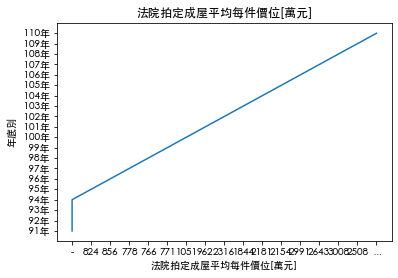

In [9]:
# 問題一：試問法院拍定成屋平均每件價位[萬元]歷年成長ㄑㄩ
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = ['Heiti TC']

with open('Real_estate_transactions_in_Taipei_City.csv','rb') as R:
    result = chardet.detect(R.read())
    
Data= pd.read_csv('Real_estate_transactions_in_Taipei_City.csv', encoding=result['encoding'])


plt.plot(Data['法院拍定成屋平均每件價位[萬元]'], Data['年底別'])
plt.xlabel('法院拍定成屋平均每件價位[萬元]')
plt.ylabel('年底別')
plt.title('法院拍定成屋平均每件價位[萬元]')
plt.show()

In [7]:
import matplotlib

# 查找字体路径
print(matplotlib.matplotlib_fname())
# 查找字体缓存路径
print(matplotlib.get_cachedir())

/Users/chenpeichen/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/chenpeichen/.matplotlib


In [8]:
import matplotlib
print([f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name])

[<Font 'Heiti TC' (STHeiti Light.ttc) normal normal 300 normal>, <Font 'Heiti TC' (STHeiti Medium.ttc) normal normal 400 normal>]


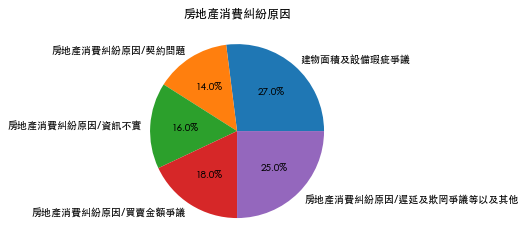

In [14]:
# 問題一 五項房地產消費糾紛原因比例圓餅圖，試問何種原因佔最多？
# 答：以建物面積及設備瑕疵爭議站最多
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = ['Heiti TC']

# 建立DataFrame
data = pd.DataFrame({
    '類別': ['建物面積及設備瑕疵爭議', '房地產消費糾紛原因/契約問題', '房地產消費糾紛原因/資訊不實', '房地產消費糾紛原因/買賣金額爭議', '房地產消費糾紛原因/遲延及欺罔爭議等以及其他'],
    '數量': [0.27, 0.14, 0.16, 0.18, 0.25]
})

# 繪製比例圓餅圖
plt.pie(data['數量'], labels=data['類別'], autopct='%1.1f%%')
plt.title('房地產消費糾紛原因')
plt.show()


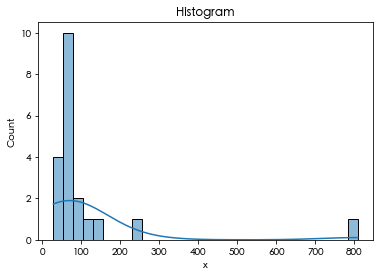

In [40]:

import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open('Real_estate_transactions_in_Taipei_City.csv','rb') as R:
    result = chardet.detect(R.read())
    
Data= pd.read_csv('Real_estate_transactions_in_Taipei_City.csv', encoding=result['encoding'])



# 繪製直方圖
sns.histplot(Data['地政士新開業人數/男[人]'], kde=True)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Histogram')
plt.show()

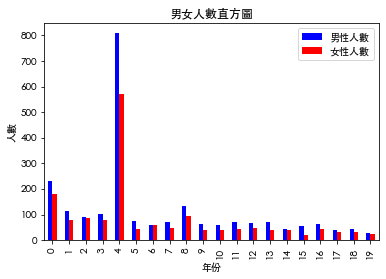

In [45]:
# 問題三：土地新開業人數歷年男女人數差異直方圖，試問男女差異化？
# 答：歷年男性皆比女性多
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = ['Heiti TC']
# 建立DataFrame
data = pd.DataFrame({
    '年份': range(91, 111),
    '男性人數': [231, 114, 90, 103, 809, 74, 59, 69, 135, 64, 59, 69, 67, 69, 42, 57, 62, 39, 45, 29],
    '女性人數': [180, 79, 85, 80, 571, 43, 58, 48, 96, 40, 41, 43, 47, 39, 38, 19, 45, 33, 32, 23]
})

# 設定直方圖顏色
colors = ['blue', 'red']

# 繪製直方圖
data[['男性人數', '女性人數']].plot(kind='bar', color=colors)
plt.xlabel('年份')
plt.ylabel('人數')
plt.title('男女人數直方圖')
plt.show()
